<a href="https://colab.research.google.com/github/HemantGorle/LSTM_Stock_Prediction/blob/main/LSTM%20Multivariate%20Stock%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LSTM** model to predict stock price using multiple features 

In [1]:
# importing all dependencies
import pandas_datareader as pdr
import pandas as pd

#key="" # Key is removed for security purpose 
#df = pdr.get_data_tiingo('AMD', api_key=key)

In [2]:
# convert data read from tiingo to CSV file
# df.to_csv('AMD.csv')

In [3]:
# read data from CSV file
!git clone https://github.com/HemantGorle/LSTM_Stock_Prediction.git
df = pd.read_csv('/content/LSTM_Stock_Prediction/AMD.csv')

Cloning into 'LSTM_Stock_Prediction'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [4]:
# creating new dataframe to plot closing price
df = pd.read_csv('/content/LSTM_Stock_Prediction/AMD.csv')
df1 = df.reset_index()['close']

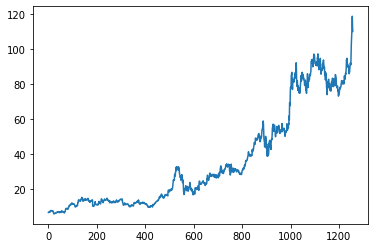

In [5]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [6]:
import numpy as np
df1

0         6.60
1         6.49
2         6.58
3         6.73
4         6.95
         ...  
1253    108.63
1254    112.56
1255    118.77
1256    112.35
1257    110.11
Name: close, Length: 1258, dtype: float64

In [7]:
# we will use MinMaxScalar function to scale the input
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.0076086 ],
       [0.00663541],
       [0.00743166],
       ...,
       [1.        ],
       [0.94320092],
       [0.92338317]])

In [8]:
##splitting dataset into train and test split
training_size = int(len(df1)*0.7)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1), :1]

In [9]:
# checking training and testing dataset rows
training_size,test_size

(880, 378)

In [10]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step - 1):
		a = dataset[i:(i + time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [11]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [12]:
print(X_train.shape), print(y_train.shape)

(779, 100)
(779,)


(None, None)

In [13]:
print(X_train)

[[0.0076086  0.00663541 0.00743166 ... 0.05600283 0.05140228 0.05175617]
 [0.00663541 0.00743166 0.00875874 ... 0.05140228 0.05175617 0.04954437]
 [0.00743166 0.00875874 0.01070512 ... 0.05175617 0.04954437 0.05034062]
 ...
 [0.21666814 0.21250995 0.2164912  ... 0.36954791 0.38078386 0.36503583]
 [0.21250995 0.2164912  0.22073786 ... 0.38078386 0.36503583 0.37405998]
 [0.2164912  0.22073786 0.22197647 ... 0.36503583 0.37405998 0.38671149]]


In [14]:
print(X_test.shape), print(y_test.shape)

(277, 100)
(277,)


(None, None)

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [16]:
# Load dependencies to create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
# fitting the model with 200 epochs and batch size 64
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 200, batch_size = 64, verbose = 1)

Epoch 1/200
13/13 [==============================] - 11s 94ms/step - loss: 0.0057 - val_loss: 0.1038
Epoch 2/200
13/13 [==============================] - 0s 20ms/step - loss: 0.0017 - val_loss: 0.0110
Epoch 3/200
13/13 [==============================] - 0s 18ms/step - loss: 6.5522e-04 - val_loss: 0.0054
Epoch 4/200
13/13 [==============================] - 0s 18ms/step - loss: 4.5846e-04 - val_loss: 0.0034
Epoch 5/200
13/13 [==============================] - 0s 19ms/step - loss: 3.7708e-04 - val_loss: 0.0036
Epoch 6/200
13/13 [==============================] - 0s 18ms/step - loss: 3.5955e-04 - val_loss: 0.0042
Epoch 7/200
13/13 [==============================] - 0s 18ms/step - loss: 3.5381e-04 - val_loss: 0.0037
Epoch 8/200
13/13 [==============================] - 0s 17ms/step - loss: 3.3673e-04 - val_loss: 0.0041
Epoch 9/200
13/13 [==============================] - 0s 18ms/step - loss: 3.2181e-04 - val_loss: 0.0031
Epoch 10/200
13/13 [==============================] - 0s 18ms/step - lo

In [19]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [20]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


##Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [21]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

22.324013550212968

In [22]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

82.29625624251457

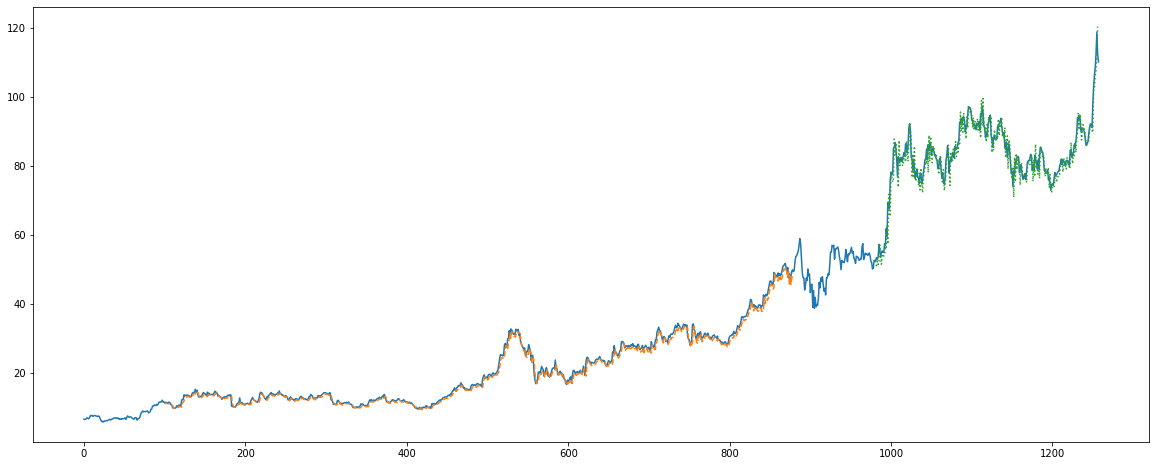

In [23]:
### Plotting 
# shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict) + (look_back*2) + 1:len(df1) - 1, :] = test_predict

# plot baseline and predictions
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(scaler.inverse_transform(df1), ls = 'solid', label = "All data")
plt.plot(trainPredictPlot, ls = 'dashed', label = "train data")
plt.plot(testPredictPlot, ls = 'dotted', label = "test data")
plt.show()

In [24]:
len(test_data)

378

In [25]:
x_input = test_data[278:].reshape(1, -1)
x_input.shape

(1, 100)

In [26]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [27]:
temp_input

[0.6802618773776873,
 0.6403609661151907,
 0.6486773422985048,
 0.659647881093515,
 0.6426612403786605,
 0.6258515438379192,
 0.6235512695744493,
 0.6340794479341768,
 0.6316907015836504,
 0.6216048836592055,
 0.643722905423339,
 0.6666371759709812,
 0.6696452269309033,
 0.6697336990179599,
 0.6764575776342564,
 0.6866318676457577,
 0.6814120145094223,
 0.6444306821197913,
 0.6586746881358931,
 0.6441652658586215,
 0.6836238166858357,
 0.6760152171989738,
 0.6668141201450942,
 0.650535256126692,
 0.671237724497921,
 0.6486773422985048,
 0.6814120145094223,
 0.7048571175794037,
 0.703087675838273,
 0.6925594974785455,
 0.6915863045209236,
 0.6713261965849775,
 0.6441652658586215,
 0.6446960983809609,
 0.6377952755905512,
 0.6383261081128904,
 0.6464655401220916,
 0.621516411572149,
 0.6289480668848978,
 0.609572679819517,
 0.5958595063257542,
 0.6091303193842343,
 0.6096611519065736,
 0.6078032380783863,
 0.6236397416615058,
 0.6398301335928515,
 0.63195611784482,
 0.6343448641953464,
 

In [28]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):
    
    if(len(temp_input) > 100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1
    

print(lst_output)

[0.94364065]
101
1 day input [0.64036097 0.64867734 0.65964788 0.64266124 0.62585154 0.62355127
 0.63407945 0.6316907  0.62160488 0.64372291 0.66663718 0.66964523
 0.6697337  0.67645758 0.68663187 0.68141201 0.64443068 0.65867469
 0.64416527 0.68362382 0.67601522 0.66681412 0.65053526 0.67123772
 0.64867734 0.68141201 0.70485712 0.70308768 0.6925595  0.6915863
 0.6713262  0.64416527 0.6446961  0.63779528 0.63832611 0.64646554
 0.62151641 0.62894807 0.60957268 0.59585951 0.60913032 0.60966115
 0.60780324 0.62363974 0.63983013 0.63195612 0.63434486 0.63806069
 0.64230735 0.64301513 0.6577015  0.66415996 0.67442272 0.65947094
 0.67097231 0.66893745 0.66486773 0.65663983 0.67079536 0.66858356
 0.67070689 0.66115191 0.65796691 0.69733699 0.69813324 0.67990799
 0.68866673 0.69079006 0.71096169 0.70671503 0.71963196 0.74121915
 0.78023534 0.77475007 0.78704769 0.78501283 0.7502433  0.74316553
 0.75342829 0.75263204 0.74776608 0.73706096 0.71830487 0.70910378
 0.71520835 0.71989737 0.74024595 

In [29]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [30]:
import matplotlib.pyplot as plt

In [31]:
len(df1)

1258

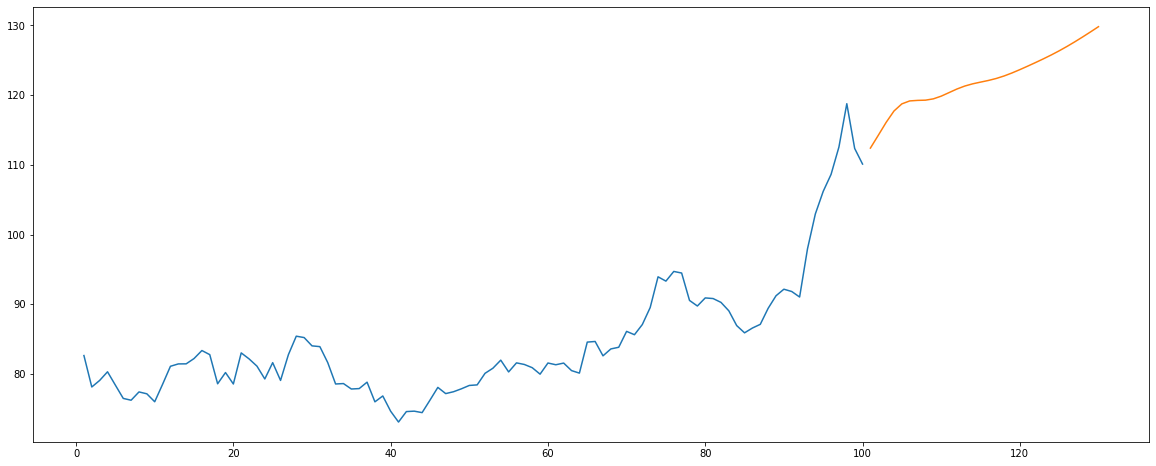

In [32]:
# plotting predicted output
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

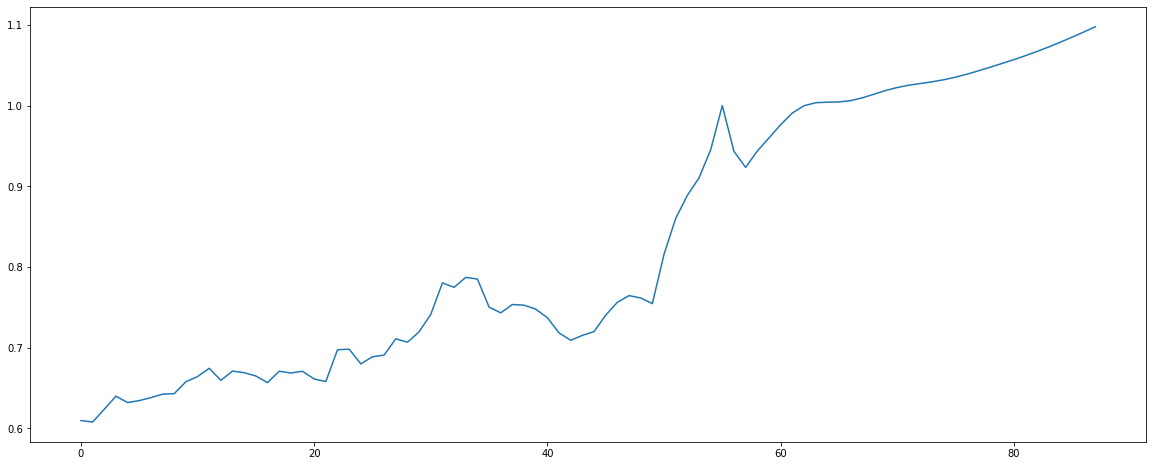

In [33]:
# plotting combined output
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [34]:
df3 = scaler.inverse_transform(df3).tolist()

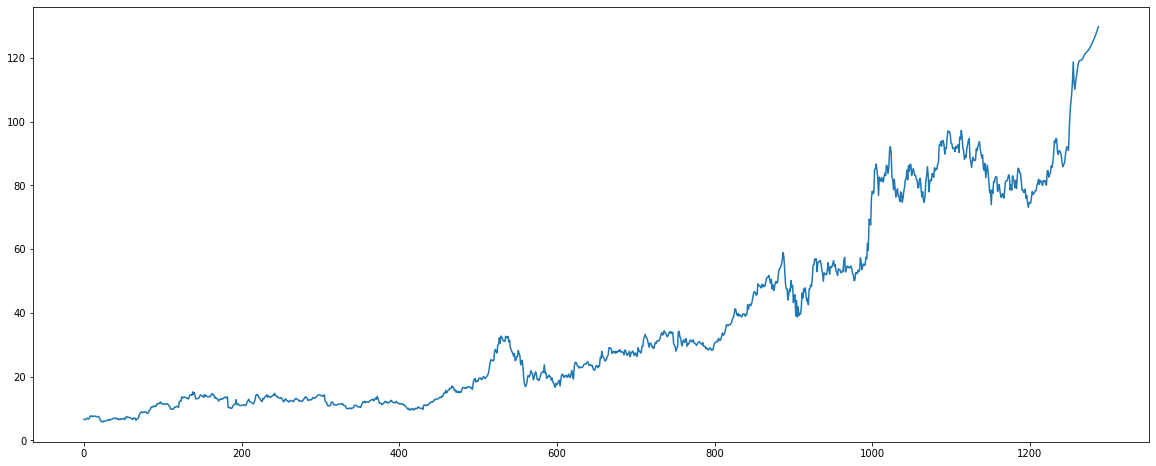

In [35]:
plt.plot(df3)